In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
data = load_iris()
iris = pd.DataFrame(data.data , columns=data.feature_names)
iris_target = pd.DataFrame(data.target, columns=['target'])
iris = pd.concat([iris,iris_target],axis=1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
# X, y, test_size=0.33, random_state=42)
# 4가지가 unpacking 되어 있다!! 그래서 4가지 다 써야한다!

In [4]:
train = iris.sample(frac=0.75)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
86,6.7,3.1,4.7,1.5,1
77,6.7,3.0,5.0,1.7,1
53,5.5,2.3,4.0,1.3,1
111,6.4,2.7,5.3,1.9,2
93,5.0,2.3,3.3,1.0,1
123,6.3,2.7,4.9,1.8,2
102,7.1,3.0,5.9,2.1,2
54,6.5,2.8,4.6,1.5,1
110,6.5,3.2,5.1,2.0,2
39,5.1,3.4,1.5,0.2,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1])
##랜덤하게 쪼개기 때문에 X_train이 달라질 것 마음에 안들면 random_state를 정해야함.
##hyper-parameter를 조절할 때 중요한 이슈!! 하나가 정해져야 편하다~
##그러니까 50개 50개 50개인데, 균일하게 뽑아야 한다.
##Data leakage문제가 발생할 수 있다.
##빅데이터에서는 사실 크게 상관 없다.

In [6]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
62,6.0,2.2,4.0,1.0
134,6.1,2.6,5.6,1.4
50,7.0,3.2,4.7,1.4
114,5.8,2.8,5.1,2.4


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier()

for 문으로 hyper-parameter 튜닝할 수 있지만! 무식하다...

그래서 GridSearchCV를 지원

그렇다면 CV??

데이터가 작을 때... data leakage가 없다!! in 실무~

성능을 체크해주는 아이! ... 

단점!!!! 최종 모델이 아니다!!!!!

장점

Overfitting인지 아닌지 Check

how?? 모델을 만들고 CV를 하였을 때, 내가 만든 모델이 성능이 좋다면? Overfitting!!

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1], cv=10,n_jobs=-1) 
#estimator?? 알고리즘을 인스턴스화한 아이!
#두번째는 전체 데이터를 다 넣는다
#n_jobs는 코어 더 쓰겠다.
# 이런 상황은 Data leakage가 생긴 것!

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [11]:
np.mean(cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1], cv=10,n_jobs=-1))
##이 아이가 내 모델 성능 보다 떨어진다면 Overfitting이 일어난 것!!
## 데이터가 작을 때 성능체크한다~~
## 데이터가 클 때는 Train-test-split

0.96666666666666679

In [12]:
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9],'leaf_size' : [10,15,20,25,30]}

In [13]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid)
# estimator를 넣어야함...

In [14]:
grid.fit(iris.iloc[:,:-1],iris.iloc[:,-1])

C:\Users\Ikjong\Anaconda3\envs\cuda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ikjong\Anaconda3\envs\cuda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [10, 15, 20, 25, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 5}

In [16]:
grid.best_score_

0.98666666666666669

이것이 싸이킷을 쓰는 이유!!

In [17]:
pd.DataFrame(grid.cv_results_).T
##중간과정을 보여주고 싶을때!!
##모든 알고리즘에 Grid를 미리 만들어놔라~~
##Copy_paste 우아하지 않다... 그래서 모듈을 만든 다음에 import를 시키면 자동화!!!
## +alpha 데코레이터를 통해서 돌려놓고 놀다가 체크하면 된다~
##성능이 안좋을 확률이 매우 높다.... 전처리가 거어어어어어어어어어어어어업나 중요!!!

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
mean_fit_time,0.00132974,0.000997543,0.000997543,0.0013299,0.00166194,0.00132942,0.00166281,0.00166186,0.00166225,0.00099802,...,0.000997225,0.000997464,0.00132974,0.000997464,0.000997543,0.000997225,0.000997305,0.000997384,0.000997305,0.000997384
mean_score_time,0.00232752,0.00166202,0.00199469,0.00166217,0.00132998,0.00232689,0.00332316,0.000997941,0.00132982,0.00199405,...,0.00166233,0.0016621,0.000997464,0.00199429,0.00132982,0.00199461,0.00132982,0.00166217,0.00166233,0.00166217
mean_test_score,0.966667,0.953333,0.98,0.973333,0.986667,0.973333,0.973333,0.98,0.973333,0.966667,...,0.973333,0.966667,0.953333,0.98,0.973333,0.986667,0.973333,0.973333,0.98,0.973333
param_leaf_size,10,10,10,10,10,10,10,10,10,15,...,25,30,30,30,30,30,30,30,30,30
param_n_neighbors,1,2,3,4,5,6,7,8,9,1,...,9,1,2,3,4,5,6,7,8,9
params,"{'leaf_size': 10, 'n_neighbors': 1}","{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 10, 'n_neighbors': 5}","{'leaf_size': 10, 'n_neighbors': 6}","{'leaf_size': 10, 'n_neighbors': 7}","{'leaf_size': 10, 'n_neighbors': 8}","{'leaf_size': 10, 'n_neighbors': 9}","{'leaf_size': 15, 'n_neighbors': 1}",...,"{'leaf_size': 25, 'n_neighbors': 9}","{'leaf_size': 30, 'n_neighbors': 1}","{'leaf_size': 30, 'n_neighbors': 2}","{'leaf_size': 30, 'n_neighbors': 3}","{'leaf_size': 30, 'n_neighbors': 4}","{'leaf_size': 30, 'n_neighbors': 5}","{'leaf_size': 30, 'n_neighbors': 6}","{'leaf_size': 30, 'n_neighbors': 7}","{'leaf_size': 30, 'n_neighbors': 8}","{'leaf_size': 30, 'n_neighbors': 9}"
rank_test_score,36,41,6,16,1,16,16,6,16,36,...,16,36,41,6,16,1,16,16,6,16
split0_test_score,0.980392,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784,0.980392,...,0.960784,0.980392,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784
split1_test_score,0.921569,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392,0.921569,...,0.980392,0.921569,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392
split2_test_score,1,0.958333,1,0.979167,1,0.979167,0.979167,0.979167,0.979167,1,...,0.979167,1,0.958333,1,0.979167,1,0.979167,0.979167,0.979167,0.979167


In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_hat = knn.predict(X_test)

In [20]:
y_test.values

array([2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1])

In [21]:
np.mean(y_hat == y_test.values)

0.97368421052631582

In [22]:
knn.score(X_test,y_test)

0.97368421052631582

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X_train,y_train)
##싸이킷에선 빨간 경보가 계속 나온다~~ why?? 버전이 계쏙 바뀌기 때문에!!
##옵션이 계속 바뀌기 때문에 맨 처음에 watermark 찍어야한다!!

C:\Users\Ikjong\Anaconda3\envs\cuda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ikjong\Anaconda3\envs\cuda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(X_test,y_test)

0.86842105263157898

Accuracy가 들쭉날쭉하면, 데이터가 충분하지 않다는 뜻!! 그러면 데이터를 더 수집해야한다~~

Test data가 부족해서 운이 좋아서 정확도가 높게 나오는 것이다. Overfitting이 아니다!

선형 vs 비선형

Perfomance가 비슷하면 선형! 아니라면 비선형!

CS 쪽에서는 결과 위주기 때문에 비선형이 더 선호한다~

In [27]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree는 각각의 가지가 Rule로 만들 수 있어서, 시스템화 하기 좋다.

In [28]:
tree = DecisionTreeClassifier()

In [29]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
tree.decision_path(X_test).toarray()
##sparse matrix 나오면 to array!!

array([[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0,

Tree를 기반으로 앙상블 모델 => RandomForest!!

앙상블 모델 장점
1. 성능 Good
2. 오버피팅X

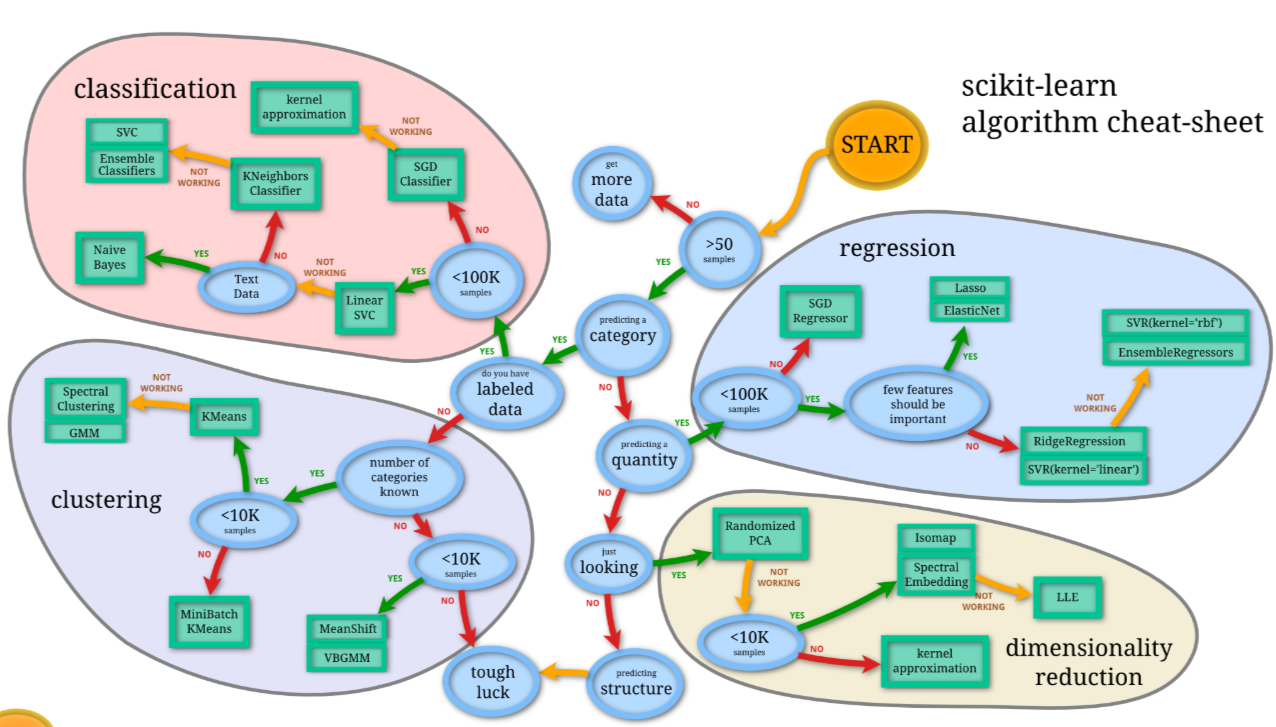

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

In [33]:
rf.fit(X_train, y_train)

C:\Users\Ikjong\Anaconda3\envs\cuda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf.feature_importances_
##이걸 통해서 Feature Selection도 가능!

array([ 0.04580749,  0.00932119,  0.38516415,  0.55970717])

Boosting 계열 중 Xgboost는 싸이킷엔 없다.

그래서 부스팅 계열은 XgBoost만 할 것!

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
from sklearn.linear_model import Perceptron

싸이킷과 케라스는 엄청 연동하기 좋다! 그래서 나중에 싸이킷에선 하지 않을 것이다~

In [37]:
from sklearn.naive_bayes import GaussianNB

베이지안 기반의 확률 모델이다~

In [38]:
from sklearn.svm import SVC
## C는 Classifier
## R은 Regression
## 싹 다 수학이다! 그래서 성능이 좋으나, 속도가 느림....
## Kernel trick을 통해서 차원을 늘인다!!
## 수학적으로 엄청 아름다운 아이~~

In [39]:
% time np.mean(cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1], cv=10,n_jobs=-1))

Wall time: 31.9 ms


0.96666666666666679

In [40]:
% time np.mean(cross_val_score(SVC(), iris.iloc[:,:-1],iris.iloc[:,-1], cv=10,n_jobs=-1))

Wall time: 43.9 ms


0.98000000000000009

In [41]:
from sklearn.dummy import DummyClassifier

사람이 하는 행동처럼 분류하는 아이

그냥 찍는 아이 ... 과거의 경험에서 뭐가 나왔을 때 뭐가 나올 것이다.

In [42]:
dummy = DummyClassifier()

우리는 선형 비선형 으로 하는 것보다 Dummy를 먼저 써봐라!

그래서 성능이 Dummy보다 안나온다면 무.조.건 전처리를 해라!

인코딩하는 것!!
1. Label encoding
2. onehot encoding

In [43]:
import seaborn as sns

In [44]:
iris = sns.load_dataset('iris')

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


판다스는 applymap이 왕이다...

In [46]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [47]:
iris.species.map({'setosa':0, 'virginica':1, 'versicolor':2}) 
##이게 라벨인코딩!! 문자를 숫자로 바꾸는 것 Category화
##얘는 연속형 데이터가 아니다!! 그래서 1이랑 2는 2배 차이가 아니다!
## X에 쓸 때 매우매우 조심해야함!! Y는 ㄱㅊ

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [50]:
le.fit(iris.species)

LabelEncoder()

In [51]:
le.transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
le.fit_transform(iris.species)
##라벨 인코딩과 같다!
##이런 다음에 다시 판다스에 넣어야한다...
##쉬운건 싸이킷이지만, 판다스로 충분히 할 수 있다!!
##싸이킷이 쉬운 이유 1. import 2. 인스턴스 3.fit 4.transform
##한번에 할 경우 인베딩을 할 것~

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

One-Hot Encoding

In [53]:
pd.get_dummies(iris.species) 
##one-hot encoding을 한방에 해결!!
##통계에선 더미변수

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
ohe = OneHotEncoder()

In [56]:
ohe.fit(iris[['species']])
##벡터가 들어가면 안된다... 2차원으로 바꿔줘야한다!

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [57]:
ohe.transform(iris[['species']])

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [58]:
ohe.fit_transform(iris[['species']]).toarray()

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

여기서 결정적인 문제점이 있다!

싸이킷에서는 변환된 것을 거꾸로 바꿔주는 것을 지원해준다~

In [59]:
ohe.inverse_transform([[ 1.,  0.,  0.],[ 0.,  1.,  0.],[ 0.,  0.,  1.]])
## one-hot encoding은 크기의 문제는 없다!
## but! 차원이 늘어나는 문제가 존재한다!!!

array([['setosa'],
       ['versicolor'],
       ['virginica']], dtype=object)

In [60]:
le.inverse_transform([2])
## 올ㅋ 신기방기봉기

array(['virginica'], dtype=object)

In [61]:
import sklearn

In [62]:
sklearn.__version__

'0.21.2'

딥러닝 모델은 모두 Normalization을 시켜야 한다!

In [63]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

Sclaing!! 그냥 시키는 것이 아니라

Domain에 따라서 Weight를 준다!

Empirical!!

map과 apply를 이용해서 데이터를 변형시켜라~~

명심해야할 것!! 예측할 때도 변화를 시켜줘야한다!!!

In [64]:
iris.sepal_length.map(lambda x:x+1).head()

0    6.1
1    5.9
2    5.7
3    5.6
4    6.0
Name: sepal_length, dtype: float64

그래서 박스플랏을 본다!

데이터 플랏 보는 순서
1. pyplot
2. boxplot
3. heatmap

In [65]:
from sklearn.model_selection import learning_curve , validation_curve
##학습하는 정도가 어떻게 변하는지 보이고, 어느정도로 할지 체크를 한다!

In [66]:
import sklearn_evaluation

In [67]:
dir(sklearn_evaluation)

['ClassifierEvaluator',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'plot',
 'preprocessing',
 'report',
 'util',
 'validate']

In [68]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1], cv=10, n_jobs=-1)

In [69]:
train_size

array([ 13,  43,  74, 104, 135])

In [70]:
train_score

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.98076923,  1.        ,  0.98076923,  0.98076923,  0.98076923,
         0.98076923,  0.99038462,  0.98076923,  0.98076923,  0.98076923],
       [ 0.96296296,  0.97037037,  0.96296296,  0.97037037,  0.98518519,
         0.96296296,  0.97777778,  0.96296296,  0.96296296,  0.97037037]])

In [71]:
test_score

array([[ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
         0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667],
       [ 1.        ,  0.93333333,  0.86666667,  0.93333333,  0.86666667,
         0.86666667,  0.86666667,  0.93333333,  1.        ,  0.93333333],
       [ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
         0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ]])

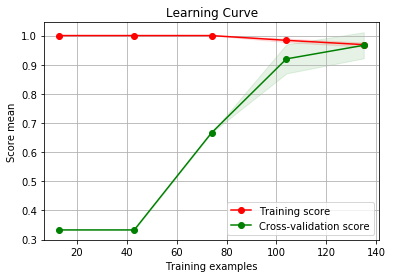

In [72]:
sklearn_evaluation.plot.learning_curve(train_score,test_score,train_size)
##순서가 다르다...

보통 데이터가 더 필요가 없으면, 어심토틱하게 수렴한다!!!

이런 그래프를 확인해보면 학습이 잘 되고 있는지 체크할 수 있다.

계속 정체하고 있다....?? 데이터의 문제가 아니라 전처리의 문제거나 아예 안되는 아이들일 것이다.

쪼금씩 올라가고 있다?? 데이터가 더 필요할 것이다!

In [73]:
train_score, test_score = validation_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.iloc[:,-1], 'n_neighbors', [3,4,5,6,7,8,9,10],cv=10, n_jobs=-1)
##param들 때문에 grid-search 와 비슷

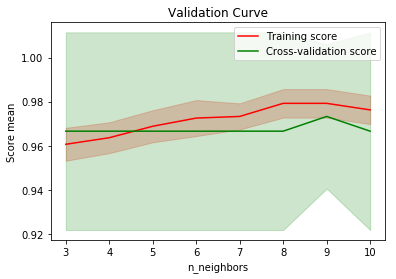

In [74]:
sklearn_evaluation.plot.validation_curve(train_score,test_score,[3,4,5,6,7,8,9,10],'n_neighbors')

각 parameter 당 validation을 할 때 어떻게 영향을 받는가를 체크할 수 있다.

이 아이는 뭘 체크하냐??

train-score는 처음 말고 가면 갈 수록 좋아진다! 학습이 많이 되고 있다.

오캄's 면도날 보다는 Bias-Variance Tradeoff 관점에서 3,4를 Pick할 것이다!

오캄's 면도날은 k를 덜 찾을 수록 Simple한 모델!

Learning-curve는 데이터가 어느정도 필요한지 아닌지 Check

Validation-curve는 Train, Validation error가 어떤식인지를 보기위해 grid-search와 같이 check

In [75]:
from sklearn.metrics import confusion_matrix

싸이킷은 행이 True 열이 Prediction

In [76]:
confusion_matrix(y_test, knn.predict(X_test))

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

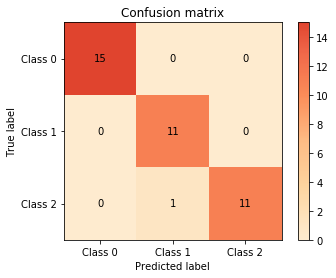

In [77]:
sklearn_evaluation.plot.confusion_matrix(y_test, knn.predict(X_test));
##요런식으로 사용!!

속도는 중요하지 않고, Recall과 Precision이 중요할 때가 있다!!

Accuracy말고 다른 성능을 보여주는 척도들!

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test, knn.predict(X_test)))
##기왕 report 나온김에 하나만 더하자!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [81]:
import pandas_profiling

In [84]:
pandas_profiling.ProfileReport(iris)

AttributeError: module 'numpy' has no attribute 'printoptions'